# Time series analysis

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io
from skimage.filters import threshold_otsu

import importlib
import sys

sys.path.append('C:\\Users\\marcu\\OneDrive\\Desktop\\PraktikumIII\\CapillaryRiseInSoil\\notebooks')

import amglib.imageutils as amg
import amglib.readers as rd
import amglib.bb as bb

In [3]:
import os

os.chdir('C:\\Users\\marcu\\OneDrive\\Desktop\\PraktikumIII\\CapillaryRiseInSoil')

Sand 3:

In [4]:
ts2 = rd.readImages('data/02_rawdata/Sand/3/3_{0:05d}.fits',first=1,last=61).astype(float)
timestamps=rd.read_fits_meta_data2('data/02_rawdata/Sand/3/3_{0:05d}.fits',first=1,last=61, parlist=['FRAME'])

  0%|          | 0/60 [00:00<?, ?it/s]

Sand 4:

In [5]:
# ts2 = rd.readImages('data/02_rawdata/Sand/4/4_{0:05d}.fits',first=1,last=29).astype(float)
# timestamps=rd.read_fits_meta_data2('data/02_rawdata/Sand/4/4_{0:05d}.fits',first=1,last=29, parlist=['FRAME'])

In [6]:
# timestamps["FRAME"][0:3]

In [7]:
# timestamps["FRAME"][15:35]

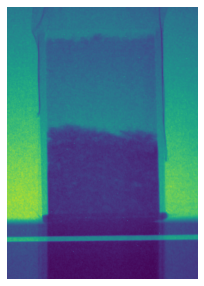

In [16]:
plt.figure(figsize=(7,5))
plt.imshow(ts2[18][::-1]) # added a flip -> originally we looked at ts2[50]
plt.axis("off");
# plt.grid()

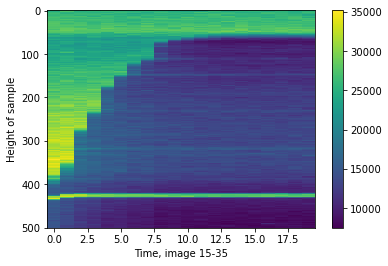

In [17]:
plt.imshow(ts2[15:35,::-1, 200].transpose(),aspect='auto', interpolation='none') # MM COMMENT -> I use 15:30 later
plt.xlabel('Time, image 15-35')
plt.ylabel('Height of sample');
plt.colorbar()

NOTE THE TIMESLICE 15 -> 35!!! 

In [67]:
tslice= ts2[15:35,::-1,200].transpose() # 3

In [68]:
# plt.imshow(tslice, aspect='auto', interpolation='none')

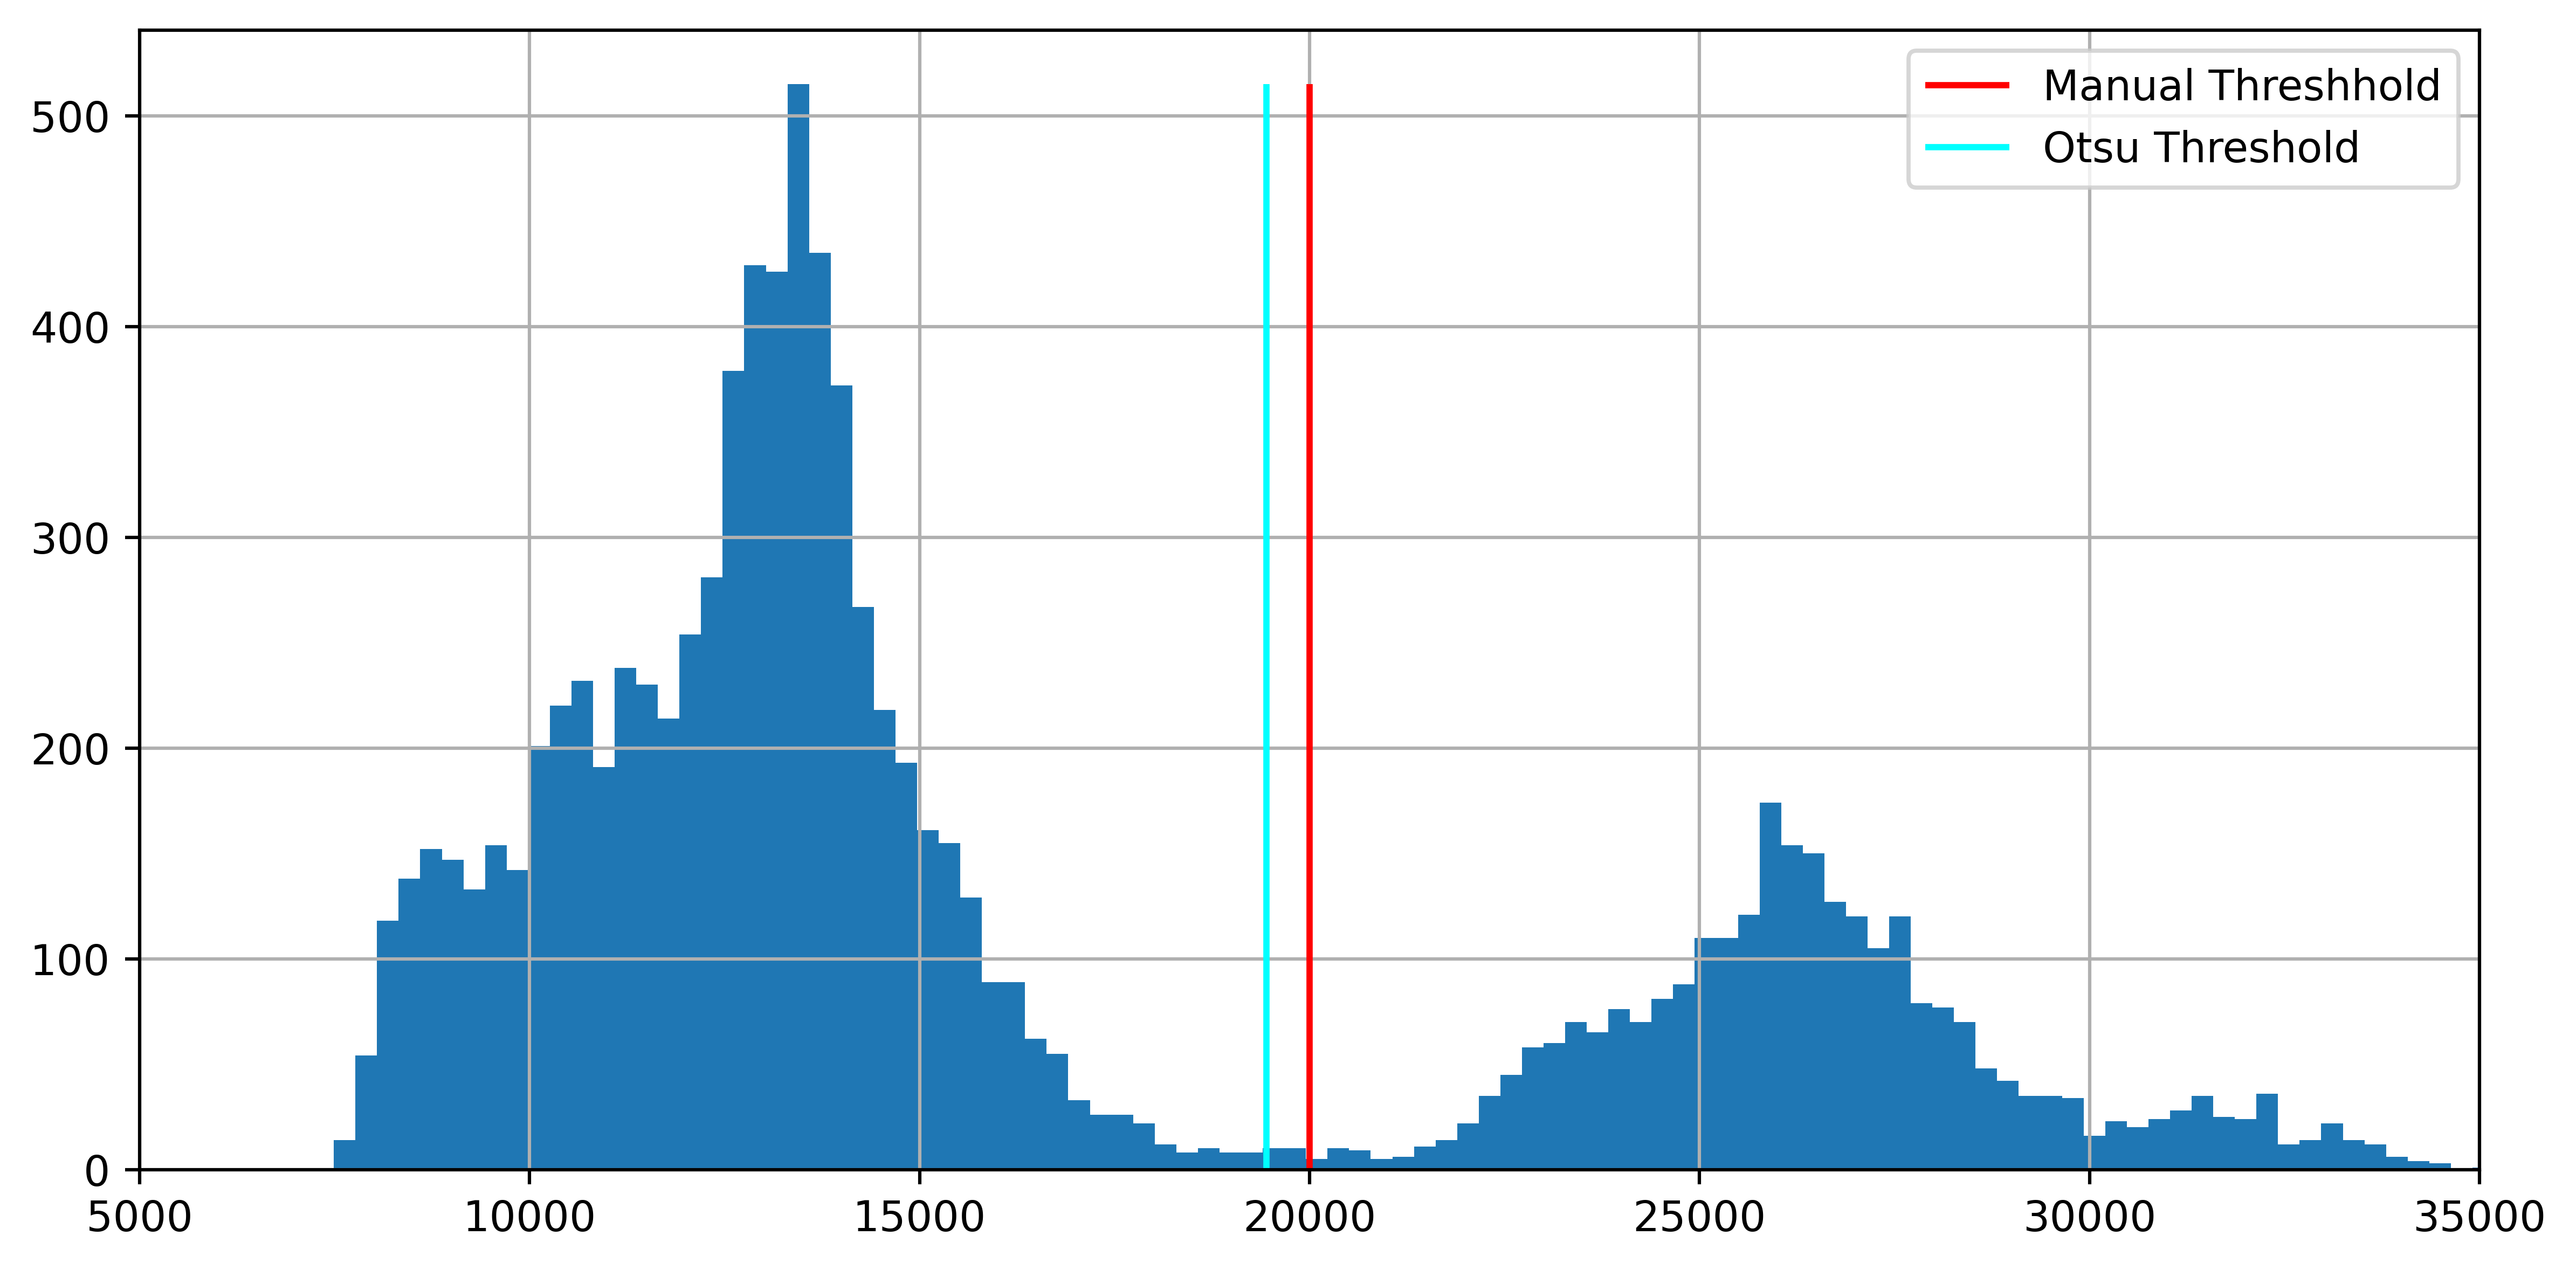

In [25]:
plt.figure(dpi=560, figsize=(10,5))
bin_fills = plt.hist(tslice.ravel(), bins=100)[0]
plt.vlines([20000],ymax=bin_fills.max(),ymin=0,color='red', label = "Manual Threshhold")
plt.vlines([threshold_otsu(tslice)],ymax=bin_fills.max(),ymin=0,color='cyan', label = "Otsu Threshold")
plt.grid()
plt.xlim(5000, 35000)
plt.legend()

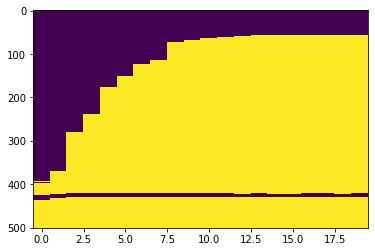

In [26]:
plt.imshow(tslice<20000,aspect='auto',interpolation='none')

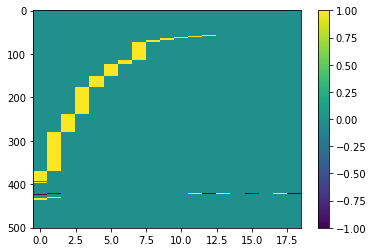

In [27]:
bts=tslice<20000
plt.imshow(bts[:,1:].astype(float)-bts[:,:-1].astype(float),aspect='auto',interpolation='none')
plt.colorbar()

In [28]:
dts=bts[:,1:].astype(float)-bts[:,:-1].astype(float)
points=np.where(0<dts)

In [ ]:
# help(rd)

In [ ]:
# timestamps=rd.read_fits_meta_data2('data/02_rawdata/Sand/3/3_{0:05d}.fits',first=1,last=61, parlist=['FRAME'])

In [ ]:
# s=timestamps['FRAME'][0][-2:]
# m=timestamps['FRAME'][0][-5:-3]
# print(m,s)

In [ ]:
# m

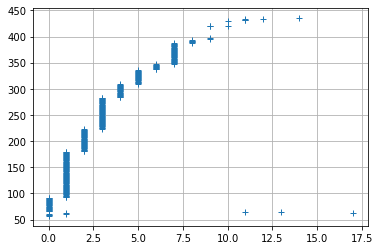

In [144]:
plt.plot(points[1], np.flip((points[0])),'+')
plt.grid()

##### From here my modifications start
Note the cutoff value below, choose such that the curve in the next few cells looks as good as possible. (few outliers)

In [29]:
cutoff = -12
# cutoff = -1

In [72]:
# (points[1], np.flip(points[0]))

In [73]:
# np.flip(points[0])

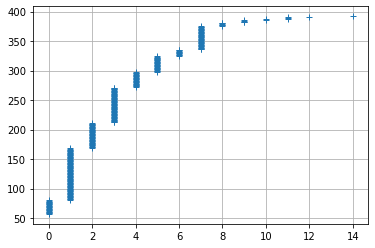

In [75]:
plt.plot(points[1][:cutoff], np.flip(points[0][:cutoff]),'+')
plt.grid()

https://neutronimaging.github.io/coding-recipes/2021/09/04/Curve-fitting.html

#### Converting into real units 

###### Time

In [101]:
import pandas as pd
import datetime 

In [112]:
timestamps_s = np.zeros((len(timestamps['FRAME']), 2))
for i in range(len(timestamps['FRAME'])):
    s=timestamps['FRAME'][i][-2:]
    m=timestamps['FRAME'][i][-5:-3]
    timestamps_s[i] = (m, s)

In [113]:
# timestamps_s

In [114]:
df = pd.DataFrame(timestamps_s)
time_array = timestamps_s[:,0] * 60 + timestamps_s[:,1]

In [115]:
# timestamps_s[:,0] * 60 + timestamps_s[:,1]

In [116]:
time_array = pd.to_timedelta(time_array, unit='second')

watch the when the slice is made above!!!

In [117]:
# time_array

In [118]:
time_array[15], time_array[30], time_array[35]

(Timedelta('0 days 00:19:11'),
 Timedelta('0 days 00:19:46'),
 Timedelta('0 days 00:19:58'))

In [119]:
time_array = time_array[15:31] 
# -> corresponds to times between first measuring and when the measurement is done (~30 pictures in)
time_array

TimedeltaIndex(['0 days 00:19:11', '0 days 00:19:13', '0 days 00:19:16',
                '0 days 00:19:18', '0 days 00:19:21', '0 days 00:19:23',
                '0 days 00:19:25', '0 days 00:19:28', '0 days 00:19:30',
                '0 days 00:19:32', '0 days 00:19:35', '0 days 00:19:37',
                '0 days 00:19:39', '0 days 00:19:42', '0 days 00:19:44',
                '0 days 00:19:46'],
               dtype='timedelta64[ns]', freq=None)

In [98]:
np.unique(points[1][:cutoff])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 14],
      dtype=int64)

In [99]:
time_array[np.unique(points[1][:cutoff])] 

TimedeltaIndex(['0 days 00:19:11', '0 days 00:19:13', '0 days 00:19:16',
                '0 days 00:19:18', '0 days 00:19:21', '0 days 00:19:23',
                '0 days 00:19:25', '0 days 00:19:28', '0 days 00:19:30',
                '0 days 00:19:32', '0 days 00:19:35', '0 days 00:19:37',
                '0 days 00:19:39', '0 days 00:19:44'],
               dtype='timedelta64[ns]', freq=None)

In [120]:
time_array[np.unique(points[1][:cutoff])] - time_array[0] # normalized to time 0 being the first image

TimedeltaIndex(['0 days 00:00:00', '0 days 00:00:02', '0 days 00:00:05',
                '0 days 00:00:07', '0 days 00:00:10', '0 days 00:00:12',
                '0 days 00:00:14', '0 days 00:00:17', '0 days 00:00:19',
                '0 days 00:00:21', '0 days 00:00:24', '0 days 00:00:26',
                '0 days 00:00:28', '0 days 00:00:33'],
               dtype='timedelta64[ns]', freq=None)

In [121]:
time_delta_array = time_array[np.unique(points[1][:cutoff])] - time_array[0]

###### Some fancy python shenanigans : switching all 14 -> 33s and so on with a dictionary trick 

In [122]:
subs = {k:v for v,k in zip(time_delta_array, np.unique(points[1][:cutoff]))}

In [125]:
new_time_array = np.array([subs.get(item,item) for item in points[1][:cutoff]])

In [127]:
new_time_array.size

336

In [128]:
@np.vectorize
def convert_timedelta_to_second_int(val):
    return val.total_seconds()

In [129]:
new_time_array = convert_timedelta_to_second_int(new_time_array)

In [130]:
new_time_array

array([33., 28., 26., 26., 26., 24., 24., 21., 21., 21., 21., 19., 19.,
       19., 19., 19., 19., 17., 17., 17., 17., 17., 17., 17., 17., 17.,
       17., 17., 17., 17., 17., 17., 17., 17., 17., 17., 17., 17., 17.,
       17., 17., 17., 17., 17., 17., 17., 17., 17., 17., 17., 17., 17.,
       17., 17., 17., 17., 17., 14., 14., 14., 14., 14., 14., 14., 14.,
       14., 14., 14., 12., 12., 12., 12., 12., 12., 12., 12., 12., 12.,
       12., 12., 12., 12., 12., 12., 12., 12., 12., 12., 12., 12., 12.,
       12., 12., 12., 12., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,
        7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,
        7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,
        7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,
        7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7

###### Pixel -> cm 

In [132]:
px_per_centimeter = 1578.0713/14 # px / cm
centimeter_per_pixel = px_per_centimeter**(-1)

In [136]:
# centimeter_per_pixel * 1e-2 # meters / pixel -> meaning about 88.716 μm / pixel, 
# centimeter_per_pixel * 60 # about 60 px is half a cm 

In [137]:
cm_height = centimeter_per_pixel * np.flip(points[0][:cutoff]) # cm * px^-1 * px = cm

In [146]:
# cm_height

##### Testing plot with units  

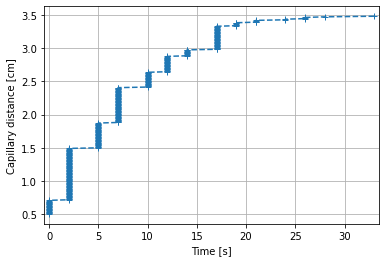

In [149]:
plt.figure()
plt.plot(new_time_array, cm_height, '+--')
plt.xlabel("Time [s]")
plt.ylabel("Capillary distance [cm]")
plt.xlim(-0.5,33.5)
plt.grid()

### Fitting 

#### Fitting -> No units 

In [154]:
from scipy.optimize import curve_fit

In [ ]:
def srqt_analysis(t, a, b): # a = np.sqrt(c) c a collection of constants
    return a*np.sqrt(t)+b
    
y_values = np.flip(points[0][:cutoff])

x_values = points[1][:cutoff]

popt, pcov = curve_fit(srqt_analysis, x_values, y_values, p0=[2.5, 0.1])

In [ ]:
a_new, b_new = popt
new_model = lambda t: a_new * np.sqrt(t) + b_new

In [ ]:
plt.figure()
plt.plot(points[1][:cutoff], np.flip(points[0][:cutoff]),'+')
plt.plot(np.linspace(0,17.5,50), new_model(np.linspace(0,17.5,50)))
plt.grid()

#### With units

In [159]:
def srqt_analysis(t, a, b): # a = np.sqrt(c) c a collection of constants
    return a*np.sqrt(t)+b

height = cm_height # cm

time = new_time_array # s

popt, pcov = curve_fit(srqt_analysis, time, height, p0=[2.5, 0.1])

In [163]:
height

array([3.47766289, 3.4687913 , 3.45991971, 3.45104812, 3.44217654,
       3.43330495, 3.42443336, 3.41556177, 3.40669018, 3.39781859,
       3.388947  , 3.38007541, 3.37120382, 3.36233223, 3.35346065,
       3.34458906, 3.33571747, 3.32684588, 3.31797429, 3.3091027 ,
       3.30023111, 3.29135952, 3.28248793, 3.27361634, 3.26474476,
       3.25587317, 3.24700158, 3.23812999, 3.2292584 , 3.22038681,
       3.21151522, 3.20264363, 3.19377204, 3.18490045, 3.17602887,
       3.16715728, 3.15828569, 3.1494141 , 3.14054251, 3.13167092,
       3.12279933, 3.11392774, 3.10505615, 3.09618456, 3.08731298,
       3.07844139, 3.0695698 , 3.06069821, 3.05182662, 3.04295503,
       3.03408344, 3.02521185, 3.01634026, 3.00746867, 2.99859708,
       2.9897255 , 2.98085391, 2.97198232, 2.96311073, 2.95423914,
       2.94536755, 2.93649596, 2.92762437, 2.91875278, 2.90988119,
       2.90100961, 2.89213802, 2.88326643, 2.87439484, 2.86552325,
       2.85665166, 2.84778007, 2.83890848, 2.83003689, 2.82116

In [158]:
# time

In [160]:
constants_sqrt, displacement = popt
new_model = lambda t: constants_sqrt * np.sqrt(t) + displacement   # cm = sqrt(...) * sqrt(time) -> constant has units m/time
time_linspace = np.linspace(0,35,100)

In [161]:
# constants_sqrt

0.681525373995132

##### Plotting the final image with units and the fit 

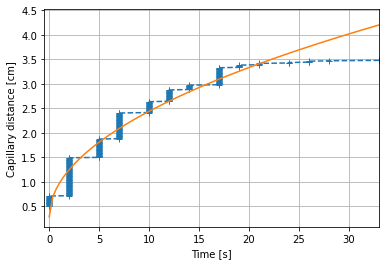

In [162]:
plt.figure()
plt.plot(new_time_array, cm_height, '+--')
plt.plot(time_linspace, new_model(time_linspace))
plt.xlabel("Time [s]")
plt.ylabel("Capillary distance [cm]")
plt.xlim(-0.5,33)
plt.grid()


##### Calculating the pre-factor and determining the average size of the spore thingie 

In [165]:
γ = 72e-3 # newtons per meter 
γ2 = 72e-3 * 1e-2 # newtons per centimeter
η = 8.9e-4 # Pa * s
ϕ = 50 # degree
ϕ_rad = 50 * np.pi / 180

Let a be the prefactor (square root of the constants) as determined by the fit to the $\sqrt t$ data. Then it according to washburn holds:

$$ a = \sqrt{\frac{\gamma  r  cos(\phi)}{2\eta}}$$

meaning:

$$ r = \frac{2a^2 \eta}{\gamma cos(\phi)}  $$

Also the unit of the prefactor as determined above is cm, but we require it in meters to determine the constants:

$$ \sqrt{\frac{N}{m} \cdot m \cdot s \cdot Pa^{-1} \cdot s^{-1}} = \sqrt{N \cdot Pa^{-1}} = \sqrt{N N^-1 \cdot m^2} = m$$